# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [2]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 310 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.6 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 54.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 61.8 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 51.5 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 49.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 39.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 48.0 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.7 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=af845e8d25a196a84bb5425c3d6692287e62c4bf512c96db88170dbe857738ee
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root = 'data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST(root = 'data', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose the ToTensor function in order to convert the image data into Pytorch tensors, which is what we need to work with Pytorch. I chose the Normalize function in order to normalize the data and scale it to a range we can use to improve the performance of the model.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


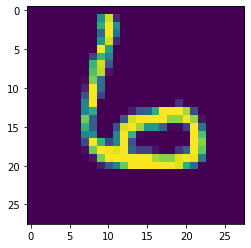

8


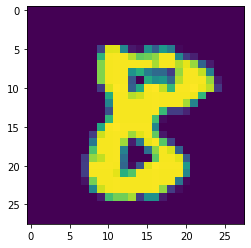

2


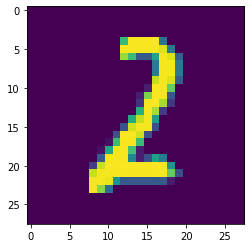

4


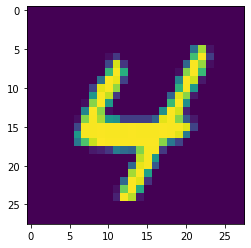

9


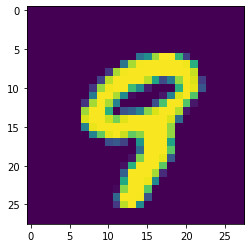

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
loss_list = []
for epoch in range(10):
    run_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        run_loss += loss.item()
        
        if i % 250 == 249:
            print("Epoch: " + str(epoch + 1) + ", Batch: " + str(i + 1) + ", Loss: " + str(run_loss / 250))
            loss_list.append(run_loss / 250)
            run_loss = 0.0
            

Epoch: 1, Batch: 250, Loss: 1.9156659507751466
Epoch: 1, Batch: 500, Loss: 0.9021480982303619
Epoch: 1, Batch: 750, Loss: 0.5580565696954727
Epoch: 2, Batch: 250, Loss: 0.4054412472844124
Epoch: 2, Batch: 500, Loss: 0.38778878599405286
Epoch: 2, Batch: 750, Loss: 0.3578773791193962
Epoch: 3, Batch: 250, Loss: 0.3350672783255577
Epoch: 3, Batch: 500, Loss: 0.3225899786949158
Epoch: 3, Batch: 750, Loss: 0.30472102960944175
Epoch: 4, Batch: 250, Loss: 0.2996961809694767
Epoch: 4, Batch: 500, Loss: 0.2756851307451725
Epoch: 4, Batch: 750, Loss: 0.2799301035106182
Epoch: 5, Batch: 250, Loss: 0.2706651299595833
Epoch: 5, Batch: 500, Loss: 0.2539702989757061
Epoch: 5, Batch: 750, Loss: 0.25273836600780486
Epoch: 6, Batch: 250, Loss: 0.24299053344130517
Epoch: 6, Batch: 500, Loss: 0.24495560504496097
Epoch: 6, Batch: 750, Loss: 0.22170895084738731
Epoch: 7, Batch: 250, Loss: 0.22266943757236005
Epoch: 7, Batch: 500, Loss: 0.22153107519447804
Epoch: 7, Batch: 750, Loss: 0.21029136483371258
Epoc

Plot the training loss (and validation loss/accuracy, if recorded).

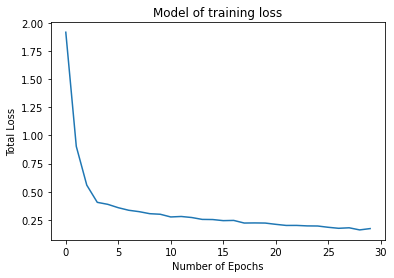

In [9]:
plt.plot(loss_list)

plt.title("Model of training loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Total Loss")

plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
correct = 0.0
total = 0.0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
accuracy_rate = 100 * correct / total

print("Accuracy: " + str(accuracy_rate) + "%")


Accuracy: 95.02%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [13]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:
torch.save(net, 'model.pt')